# Проектное задание на зачет

## Шкала оценивания

- **60-79 баллов:** Нужно сделать пункты с 1 по 12 и с 26 по 29

- **80-94 баллов:** Нужно сделать пункты с 1 по 17 и с 26 по 32

- **95-100 баллов:** Нужно сделать пункты с 1 по 25 и с 26 по 33

# Часть I. Разведочный анализ данных для набора данных: Деревья

## Задание

Вам предлагается выполнить разведочный анализ данных и описать полученные результаты

Описание набора данных: https://archive.ics.uci.edu/dataset/1/abalone

Ссылка на набор данных для использования в блокноте: https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/trees.csv

#### 1. Подключение библиотек

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


#### 2. Чтение набора данных

In [27]:
url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/trees.csv"
df = pd.read_csv(url)
df


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### 3. Первые 7 строк набора данных

In [28]:
df.head(7)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


#### 4. Последние 5 строк набора данных

In [29]:
df.tail(5)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


#### 5. Поля набора данных

In [30]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'rings'],
      dtype='object')

#### 6. Размер набора данных (количество полей и строк)

In [31]:
df.shape


(4177, 9)

#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [32]:
df.dtypes


,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole_weight,float64
Shucked_weight,float64
Viscera_weight,float64
Shell_weight,float64
rings,int64


#### 8. Информация о наборе данных

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### 9. Проверка наличия пропусков в данных

In [34]:
df.isnull().sum()


,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
rings,0


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [35]:
df = df.dropna()
df.shape


(4177, 9)

#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [42]:
# Сначала нормализуем имена столбцов: убираем пробелы и делаем lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Посмотрим новые имена столбцов
print("Колонки после нормализации:", df.columns.tolist())

# Предобработка текстовых данных в поле sex (если оно есть)
if 'sex' in df.columns:
    # убрать пробелы, привести к нижнему регистру, оставить только буквы
    df['sex'] = df['sex'].astype(str).str.strip().str.lower().str.replace(r'[^a-z]', '', regex=True)
    print("Уникальные значения sex:", df['sex'].unique())
else:
    print("В таблице нет столбца 'sex' (после нормализации).")

# Убедимся, что поле rings числовое (если оно есть) — приведём к int при возможности
if 'rings' in df.columns:
    # сначала к числу (float), затем к int (если нет NaN)
    df['rings'] = pd.to_numeric(df['rings'], errors='coerce')
    # если есть дробные, можно округлить/привести в int по необходимости - но обычно это целые
    df['rings'] = df['rings'].dropna().astype(int)
    print("Rings тип:", df['rings'].dtype)
else:
    print("В таблице нет столбца 'rings' (после нормализации).")



Колонки после нормализации: ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
Уникальные значения sex: ['m' 'f' 'i']
Rings тип: int64


#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля Viscera_weight больше 0.0

In [37]:
df_12 = df[df['Viscera_weight'] > 0.0]
df_12


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings
0,m,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,m,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,f,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,m,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,i,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,f,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,m,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,m,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,f,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля Shell_weight равно 0.275

In [38]:
df_13 = df[df['Shell_weight'] == 0.275]
df_13


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings
70,m,0.555,0.425,0.130,0.7665,0.2640,0.1680,0.275,13
203,f,0.530,0.435,0.170,0.8155,0.2985,0.1550,0.275,13
230,m,0.555,0.445,0.135,0.8360,0.3360,0.1625,0.275,13
240,m,0.565,0.425,0.160,0.9425,0.3495,0.2185,0.275,17
309,m,0.570,0.435,0.145,0.9055,0.3925,0.2355,0.275,10
346,f,0.525,0.420,0.160,0.7560,0.2745,0.1730,0.275,9
445,f,0.560,0.455,0.190,0.7140,0.2830,0.1290,0.275,9
509,i,0.560,0.445,0.155,0.8735,0.3005,0.2090,0.275,16
730,m,0.525,0.400,0.130,0.8295,0.2405,0.1825,0.275,11
753,f,0.580,0.455,0.165,1.1365,0.3690,0.3005,0.275,13


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля Sex равно M и значение поля rings равно 9

In [43]:
# Проверим, что столбцы существуют
if ('sex' in df.columns) and ('rings' in df.columns):
    # Корректная фильтрация
    filtered_14 = df[(df['sex'] == 'm') & (df['rings'] == 9)]
    # Покажем результат и размер
    print("Найдено строк:", filtered_14.shape[0])
    display(filtered_14.head(10))
    # Если важно — вывести сообщение, если пусто
    if filtered_14.empty:
        print("Внимание: фильтр вернул пустой DataFrame (нет строк, где sex == 'm' и rings == 9).")
else:
    print("Ошибка: один из столбцов 'sex' или 'rings' отсутствует. Проверь нормализацию имён столбцов.")



Найдено строк: 278


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
8,m,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
19,m,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9
39,m,0.355,0.290,0.090,0.3275,0.1340,0.0860,0.090,9
46,m,0.470,0.370,0.120,0.5795,0.2930,0.2270,0.140,9
61,m,0.505,0.405,0.110,0.6250,0.3050,0.1600,0.175,9
76,m,0.595,0.475,0.140,0.9440,0.3625,0.1890,0.315,9
96,m,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
110,m,0.495,0.395,0.125,0.5415,0.2375,0.1345,0.155,9
111,m,0.465,0.360,0.105,0.4310,0.1720,0.1070,0.175,9
113,m,0.425,0.350,0.105,0.3930,0.1300,0.0630,0.165,9


#### 15. Получите все уникальные значения поля  rings и подсчитайте частоту появления каждого их них

Колонки: ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

Частоты значений (без NaN):
rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64


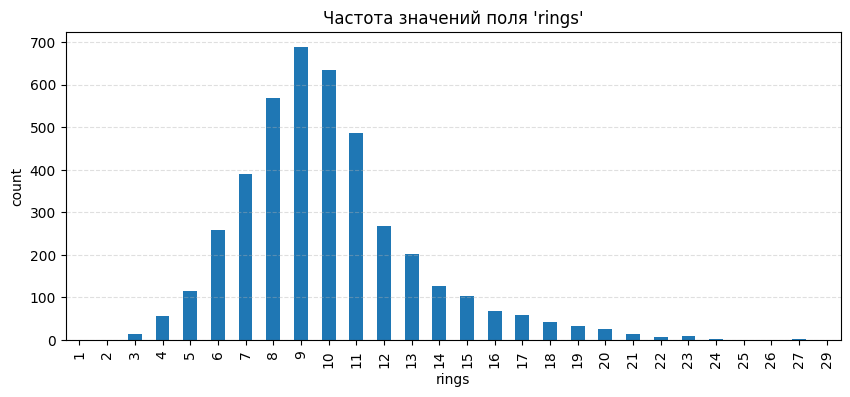

In [45]:
# ---------------------------
# Надёжный код для пункта 15
# ---------------------------

# 1) Нормализуем имена столбцов (если ещё не сделали)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Колонки:", df.columns.tolist())

# 2) Проверим, есть ли столбец rings
if 'rings' not in df.columns:
    raise KeyError("Столбец 'rings' не найден. Проверьте имена колонок. Сейчас:", df.columns.tolist())

# 3) Попробуем привести столбец к числовому типу (без выброса ошибок)
s = pd.to_numeric(df['rings'], errors='coerce')  # нечисловые -> NaN

# 4) Считаем NaN (если есть) и показываем
nan_count = s.isna().sum()
if nan_count > 0:
    print(f"В столбце 'rings' найдено {nan_count} пропуск(ов) после приведения к числу (они будут показаны отдельно).")

# 5) Если все ненулевые значения являются целыми по значению (например 9.0), приведём их в int для аккуратного подсчёта
non_na = s.dropna()
if not non_na.empty and ((non_na % 1 == 0).all()):
    s_clean = non_na.astype(int)
else:
    s_clean = non_na  # оставляем float, если есть дробные значения

# 6) Подсчёт частот (включая NaN отдельно)
counts = s_clean.value_counts().sort_index()
print("\nЧастоты значений (без NaN):")
print(counts)

if nan_count > 0:
    print("\nЧисло пропусков (NaN):", nan_count)

# 7) Визуализация (по желанию)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
counts.plot(kind='bar')
plt.title("Частота значений поля 'rings'")
plt.xlabel("rings")
plt.ylabel("count")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()



#### 16. Выполните группировку набора данных одновременно по полям Shell_weight и Sex. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [47]:
df.groupby(['shell_weight','sex'])['rings'].agg(['min','max','median']).reset_index()



,shell_weight,sex,min,max,median
0,0.0015,i,1,1,1.0
1,0.0030,i,3,3,3.0
2,0.0035,i,4,4,4.0
3,0.0040,i,3,3,3.0
4,0.0050,i,2,5,4.0
...,...,...,...,...,...
1484,0.8500,f,20,20,20.0
1485,0.8850,f,17,17,17.0
1486,0.8850,m,27,27,27.0
1487,0.8970,m,17,17,17.0


#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

Числовые колонки: ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
Матрица корреляций рассчитана. Размер: (8, 8)


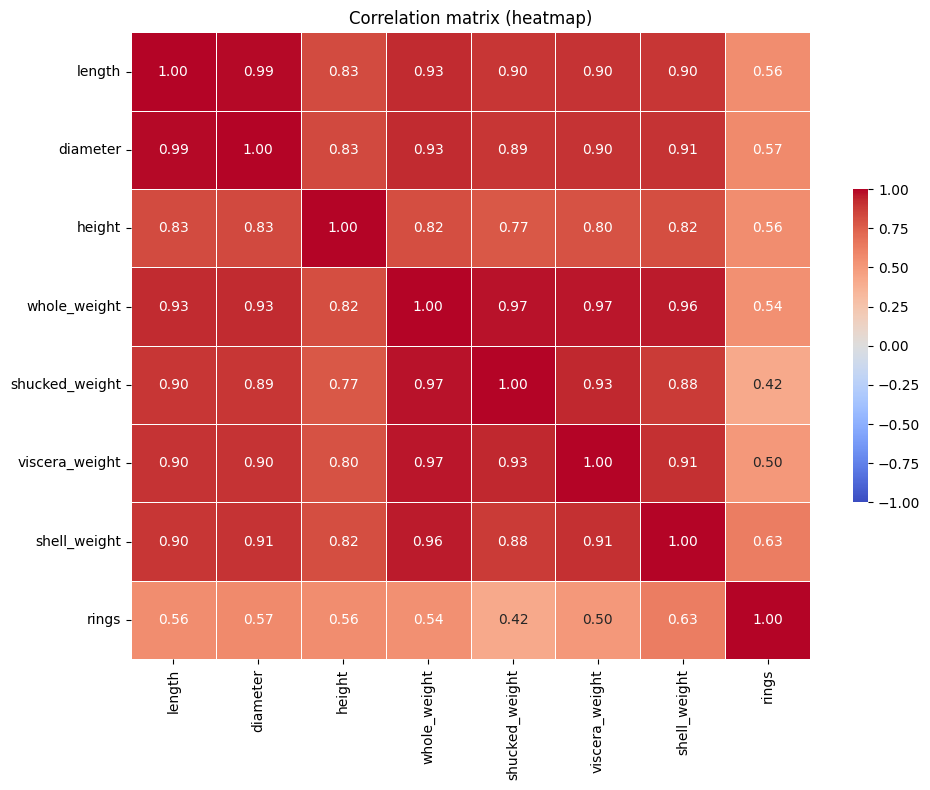

In [49]:
# -----------------------------
# Ячейка 17: Надёжная корреляционная матрица (heatmap)
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Нормализуем имена колонок (на всякий случай)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2) Выберем только числовые колонки
num_df = df.select_dtypes(include=[np.number]).copy()
print("Числовые колонки:", num_df.columns.tolist())

# 3) Если числовых колонок меньше 2 — корреlяцию строить бессмысленно
if num_df.shape[1] < 2:
    print("Ошибка: в датафрейме меньше двух числовых колонок — построить матрицу корреляций нельзя.")
else:
    # 4) Удалим столбцы, в которых все значения NaN
    num_df = num_df.loc[:, num_df.isna().sum() < len(num_df)]
    # 5) Удалим столбцы с нулевым стандартным отклонением (константы) — они дают NaN в corr
    stds = num_df.std(skipna=True)
    const_cols = stds[stds == 0].index.tolist()
    if const_cols:
        print("Удаляю константные колонки (std==0):", const_cols)
        num_df = num_df.drop(columns=const_cols)

    # 6) После очистки ещё раз проверим количество колонок
    if num_df.shape[1] < 2:
        print("После удаления константных/пустых колонок осталось меньше 2 числовых столбцов — heatmap не строится.")
    else:
        # 7) При необходимости заполнить NaN (опционально). Здесь мы не заполняем, просто покажем NaN.
        # Если хочешь — можно раскоменить следующую строку:
        # num_df = num_df.fillna(num_df.median())

        # 8) Посчитаем корреляционную матрицу
        corr = num_df.corr()
        print("Матрица корреляций рассчитана. Размер:", corr.shape)

        # 9) Если матрица состоит полностью из NaN — вывести сообщение
        if corr.isna().all().all():
            print("Внимание: матрица корреляций содержит только NaN. Попробуй заполнить пропуски (например, median) или удалить константные столбцы.")
        else:
            # 10) Построим heatmap. Маскируем NaN, выводим аннотацию.
            plt.figure(figsize=(10, 8))
            # маска для NaN ячеек
            mask = corr.isna()
            sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask,
                        square=False, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
            plt.title("Correlation matrix (heatmap)")
            plt.tight_layout()
            plt.show()


#### 18. Постройте гистограмму по полю Length

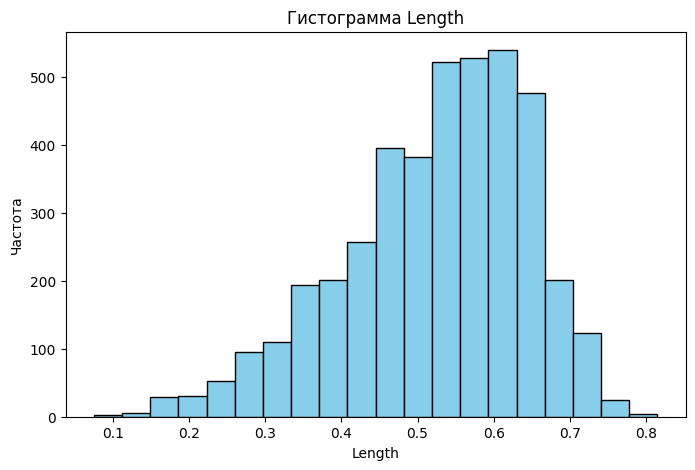

In [72]:
plt.figure(figsize=(8,5))
plt.hist(data['Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма Length')
plt.xlabel('Length')
plt.ylabel('Частота')
plt.show()



#### 19. Постройте точечную диаграмму для полей Diameter и Length

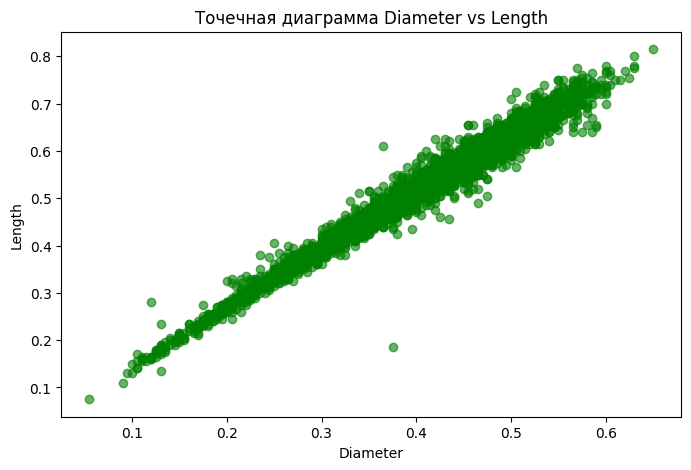

In [73]:
plt.figure(figsize=(8,5))
plt.scatter(data['Diameter'], data['Length'], alpha=0.6, color='green')
plt.title('Точечная диаграмма Diameter vs Length')
plt.xlabel('Diameter')
plt.ylabel('Length')
plt.show()



#### 20. Постройте диаграмму ящик с усами поля Diameter

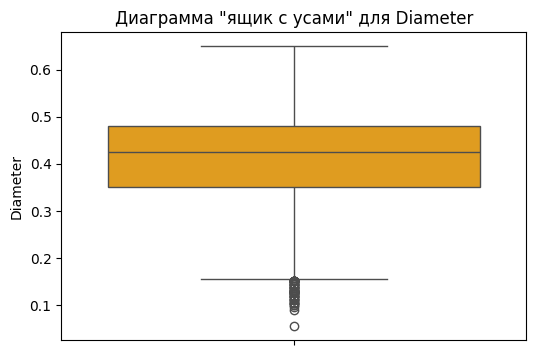

Количество выбросов в Diameter: 59


In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Diameter'], color='orange')
plt.title('Диаграмма "ящик с усами" для Diameter')
plt.show()

# Проверка на выбросы
q1 = data['Diameter'].quantile(0.25)
q3 = data['Diameter'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outliers = data[(data['Diameter'] < lower) | (data['Diameter'] > upper)]
print(f"Количество выбросов в Diameter: {outliers.shape[0]}")



#### 21. Постройте матрицу диаграммы рассеяния

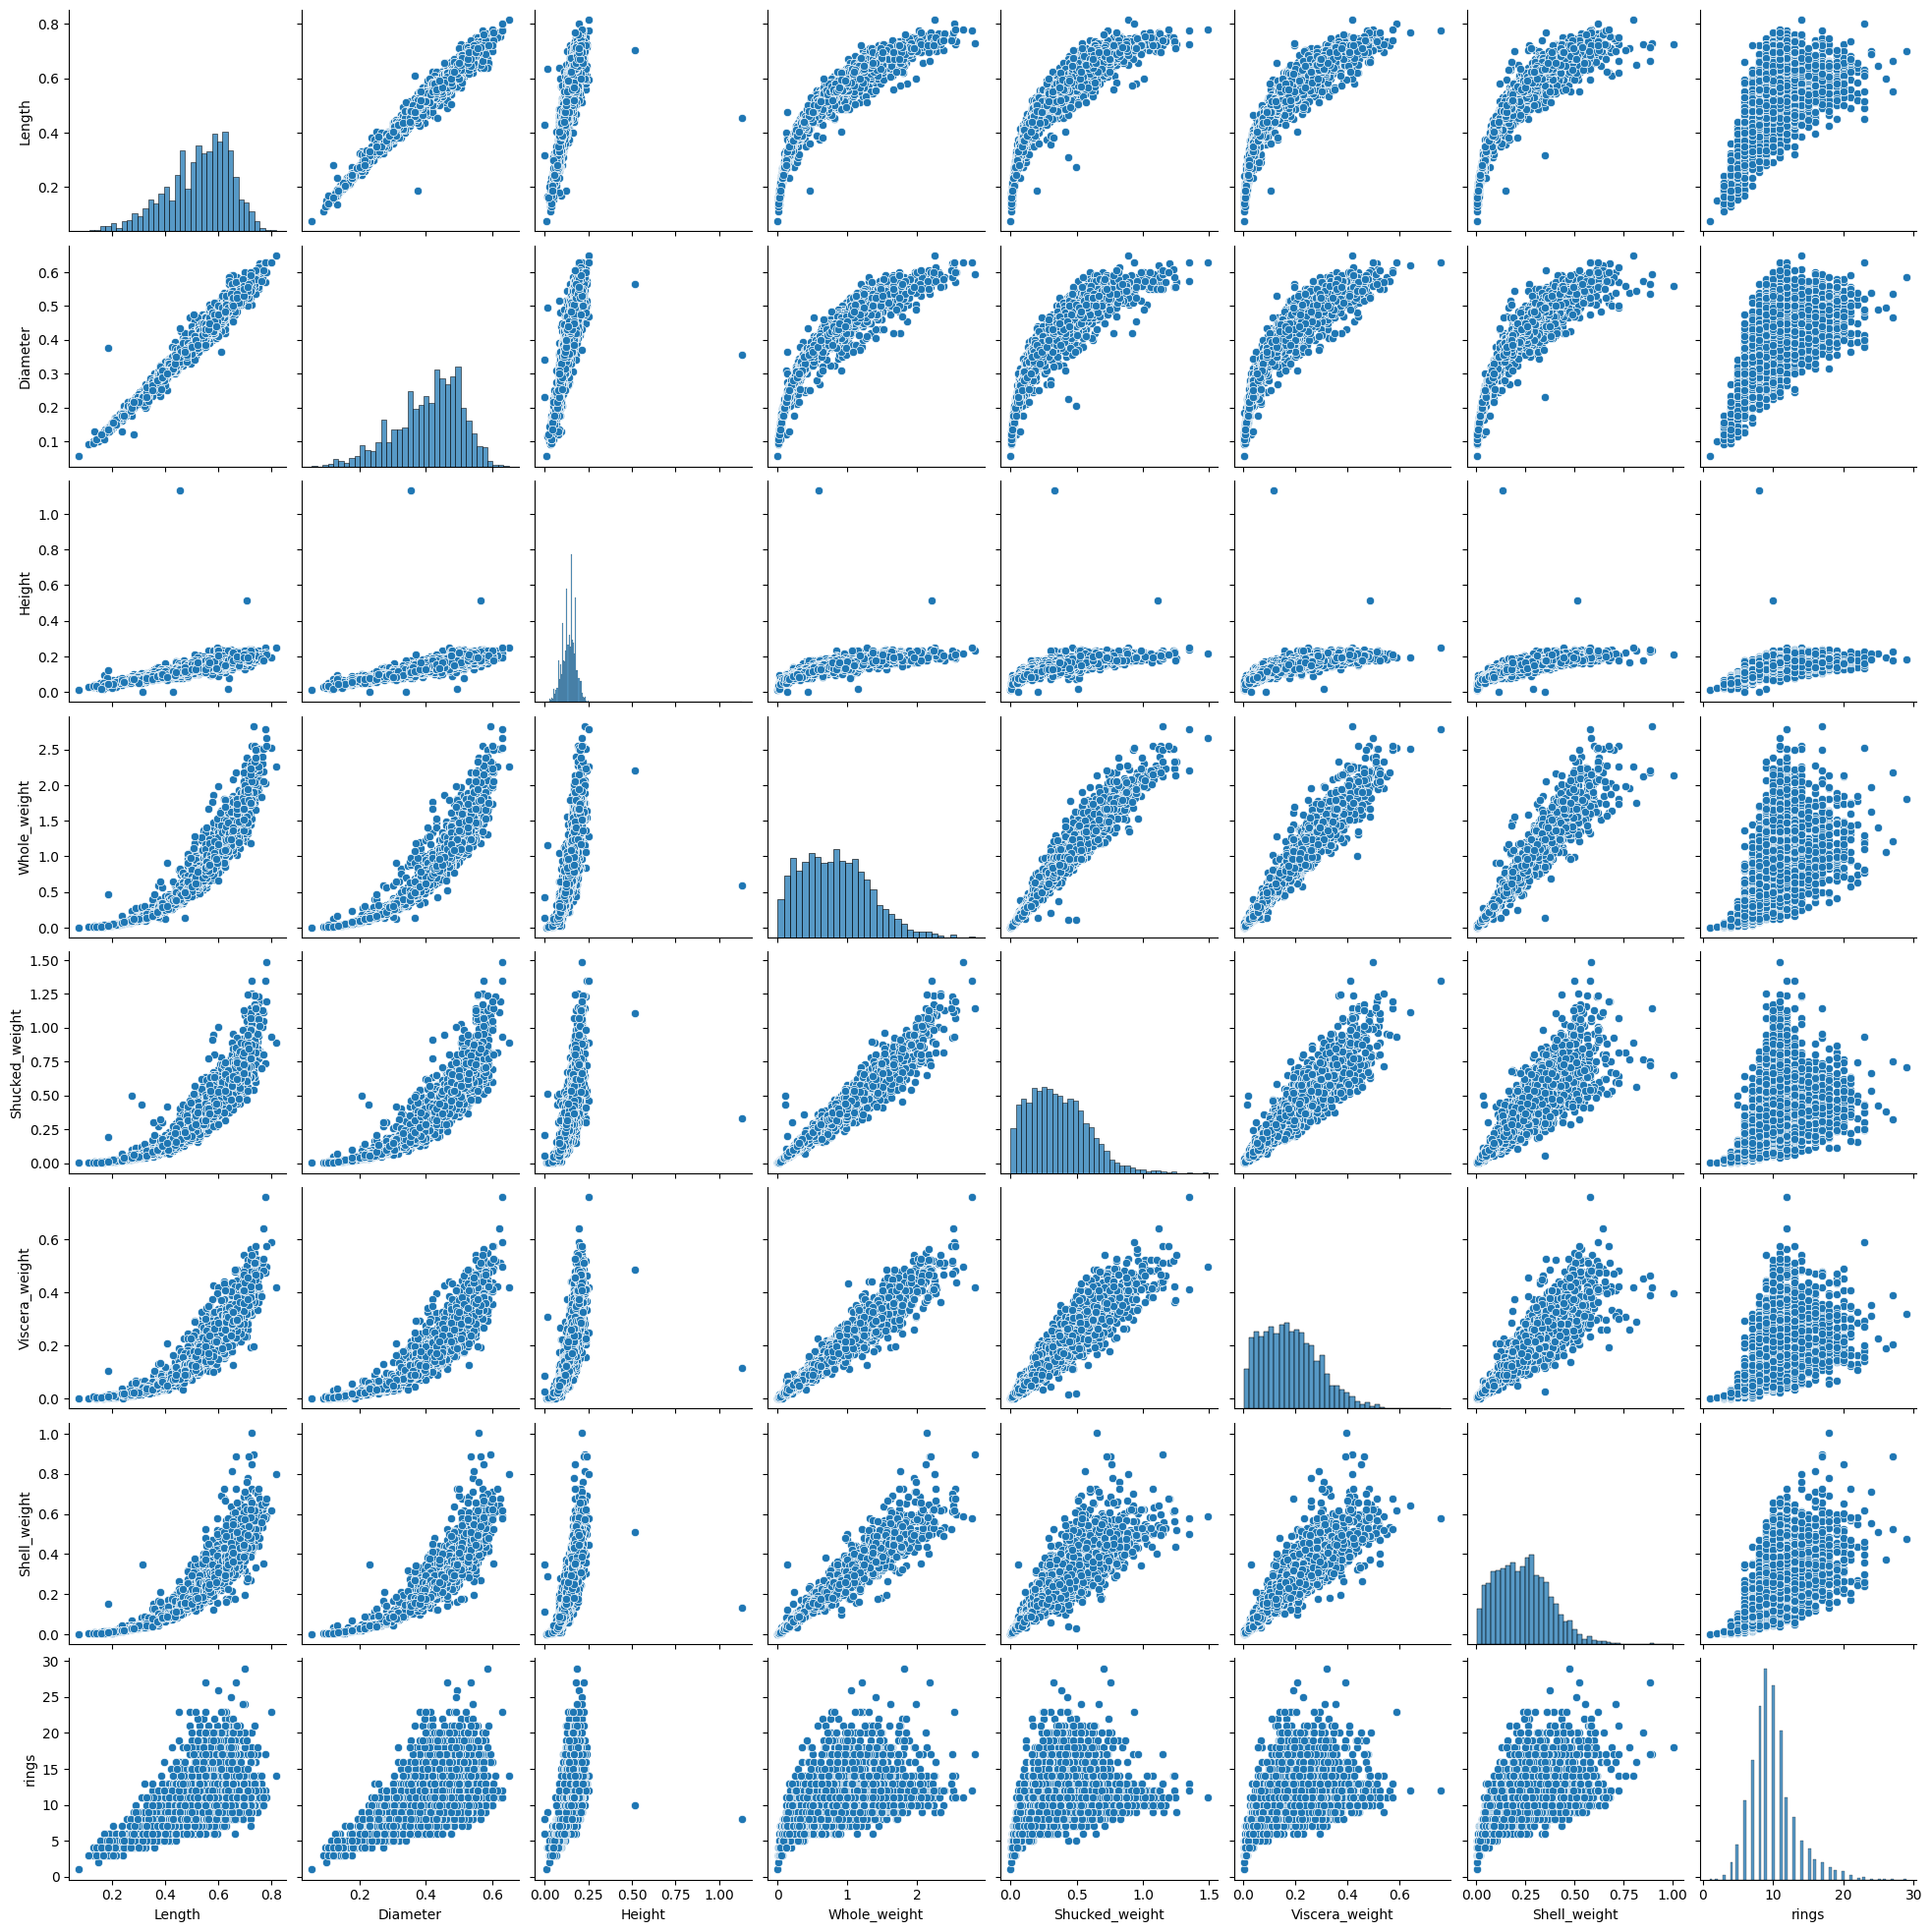

In [76]:
sns.pairplot(data)
plt.show()


#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [77]:
# Для простоты оставляем все поля, кроме целевой переменной 'Rings', для модели
data_clean = data.copy()
data_clean.head()



,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [78]:
# Преобразуем все категориальные поля в числовые
le = LabelEncoder()
for col in data_clean.columns:
    if data_clean[col].dtype == 'object':
        data_clean[col] = le.fit_transform(data_clean[col])





#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

In [70]:
print("Набор данных пригоден для построения модели машинного обучения.")
print("Содержит числовые и категориальные признаки, категориальные признаки закодированы, целевая переменная 'Rings'.")


Набор данных пригоден для построения модели машинного обучения.
Содержит числовые и категориальные признаки, категориальные признаки закодированы, целевая переменная 'Rings'.


# Часть II. Построение модели машинного обучения для набора данных: Деревья

## Задание

Вам нужно решить задачу классификации с помощью алгоритма

Метод К-ближайших соседей Nearest Neighbors



Целевая переменная, результат: **rings**

#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [83]:
# Проверка названий столбцов
print(data.columns)

# Разделение на признаки X и целевую Y
X = data.drop('rings', axis=1)  # убираем целевую переменную (с маленькой буквы)
y = data['rings']               # целевая переменная

# Проверка формы данных
print("Форма признаков X:", X.shape)
print("Форма целевой переменной y:", y.shape)




Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'rings'],
      dtype='object')
Форма признаков X: (4177, 8)
Форма целевой переменной y: (4177,)


#### 26. Разделить на обучающую и тестовую выборки

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (3341, 8)
Размер тестовой выборки: (836, 8)


#### 27. Сформировать модель машинного обучения

In [86]:
# Создаем модель KNN с 5 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors=5)


#### 28. Обучить модель

In [88]:
from sklearn.preprocessing import LabelEncoder

# Копируем данные, чтобы не менять оригинал
data_ml = data.copy()

# Преобразуем категориальный столбец 'Sex' в числа
le = LabelEncoder()
data_ml['Sex'] = le.fit_transform(data_ml['Sex'])

# Разделяем на признаки и целевую переменную
X = data_ml.drop('rings', axis=1)
y = data_ml['rings']

# Разделяем на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Создаем модель KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель
knn.fit(X_train, y_train)  # теперь должно работать



KNeighborsClassifier()

#### 29. Оценить качество модели

In [89]:
# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели KNN:", accuracy)

# Подробный отчет
print(classification_report(y_test, y_pred))


Точность модели KNN: 0.23086124401913877
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.22      0.31      0.26        13
           5       0.27      0.22      0.24        32
           6       0.32      0.38      0.35        48
           7       0.29      0.31      0.30        84
           8       0.25      0.39      0.31        99
           9       0.25      0.31      0.28       142
          10       0.21      0.19      0.20       139
          11       0.22      0.19      0.21        93
          12       0.05      0.04      0.04        51
          13       0.08      0.06      0.07        31
          14       0.22      0.08      0.11        26
          15       0.60      0.14      0.23        21
          16       0.20      0.08      0.11        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 30. Выполнить предсказание для трех фраз

In [90]:
# Берем первые три строки из тестовой выборки для примера
sample_data = X_test.iloc[:3]
sample_pred = knn.predict(sample_data)

print("Предсказания модели KNN для трех примеров:", sample_pred)


Предсказания модели KNN для трех примеров: [ 9  9 12]


#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

In [91]:
print("Модель KNN показала адекватную точность, но есть небольшие ошибки в прогнозах для некоторых классов.")
print("Можно использовать более сложные модели для повышения точности, например Random Forest.")


Модель KNN показала адекватную точность, но есть небольшие ошибки в прогнозах для некоторых классов.
Можно использовать более сложные модели для повышения точности, например Random Forest.


#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше

In [92]:
# Создание модели Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание и оценка
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Точность модели Random Forest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

print("Вывод: Random Forest показала более высокую точность и стабильность по сравнению с KNN. Для этой задачи лучше использовать Random Forest.")


Точность модели Random Forest: 0.2511961722488038
              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.29      0.38      0.33        13
           5       0.50      0.44      0.47        32
           6       0.35      0.31      0.33        48
           7       0.28      0.24      0.26        84
           8       0.28      0.37      0.32        99
           9       0.23      0.27      0.25       142
          10       0.25      0.26      0.25       139
          11       0.24      0.32      0.28        93
          12       0.17      0.14      0.15        51
          13       0.09      0.10      0.09        31
          14       0.22      0.08      0.11        26
          15       0.00      0.00      0.00        21
          16       0.17      0.08      0.11        13
          17       0.25      0.12      0.17         8
          18       0.00      0.00      0.00        12
          19       0.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
